Processing scale 3
Estimate target measure with 784 points
Compute semi-discrete optimal transport
Processing scale 2
Estimate Source GMM with 4 components
Estimate target measure with 1000 points
Compute semi-discrete optimal transport
Processing scale 1
Estimate Source GMM with 4 components
Estimate target measure with 1000 points
Compute semi-discrete optimal transport
Processing scale 0
Estimate Source GMM with 4 components
Estimate target measure with 1000 points
Compute semi-discrete optimal transport
Elapsed time :  5.654369592666626  seconds
Processing scale 3
Processing scale 2
Processing scale 1
Processing scale 0
Elapsed time :  5.518772125244141  seconds


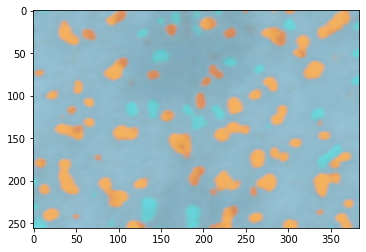

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image

# from gmm_ot import *
from src.patch import *
from src.gaussian_texture import *
import src.semidiscrete_ot as sdot


# Load input image
im0 = np.double(plt.imread('tex/ground1013_small.png'))
m,n,nc=im0.shape

import src.texto as texto

np.random.seed(0)
w=5
model = texto.model(im0, w, 4, 4,mode="AFFINE") 
synth = model.synthesize(256, 384)
plt.imshow(synth)

Processing scale 3
Processing scale 2
Processing scale 1
Processing scale 0
Elapsed time :  2.8643300533294678  seconds


In [28]:
def display_patches(patches,w):
    # Assuming patches is of shape (N, 27)
    N = patches.shape[0]
    
    patch_side = int(np.ceil(np.sqrt(N)))
    # Total number of elements in the grid
    total_patches = patch_side**2

    # Number of padding elements needed
    padding_patches = total_patches - N
    if padding_patches > 0:
        # Create white patches for padding
        black_patch = np.ones((padding_patches, 27))
        # Append black patches to the original patches
        patches = np.vstack((patches, black_patch))

    # Reshape each patch to 3x3x3
    reshaped_patches = patches.reshape(-1, w, w, 3)

    # Initialize an empty array for the final image
    display_image = np.zeros((patch_side * w, patch_side * w, 3))

    # Fill the display image with patches
    for i in range(patch_side):
        for j in range(patch_side):
            display_image[i*w:(i+1)*w, j*w:(j+1)*w, :] = reshaped_patches[i*patch_side + j]

    plt.imshow(np.clip(display_image,0,1))

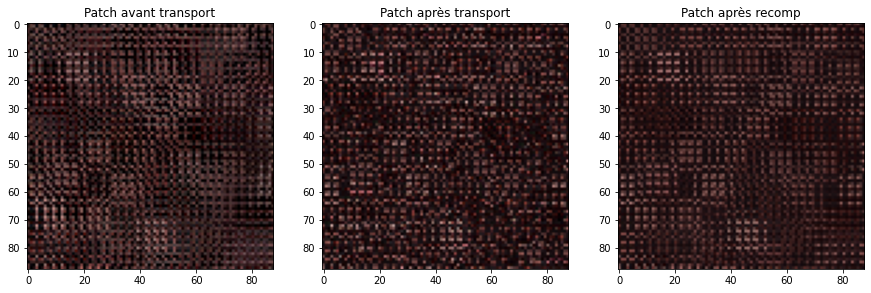

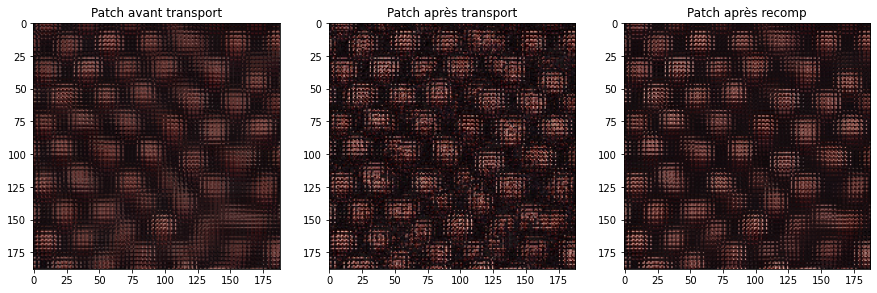

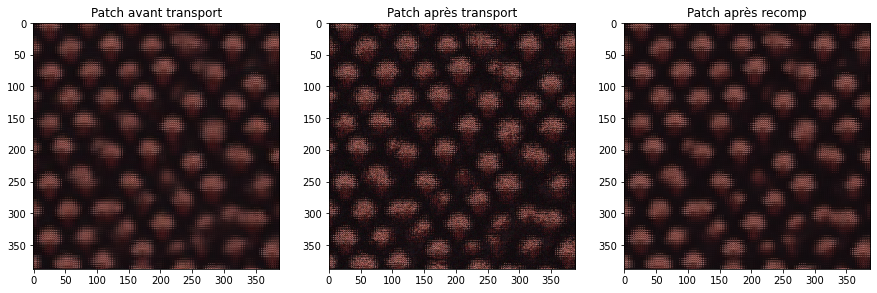

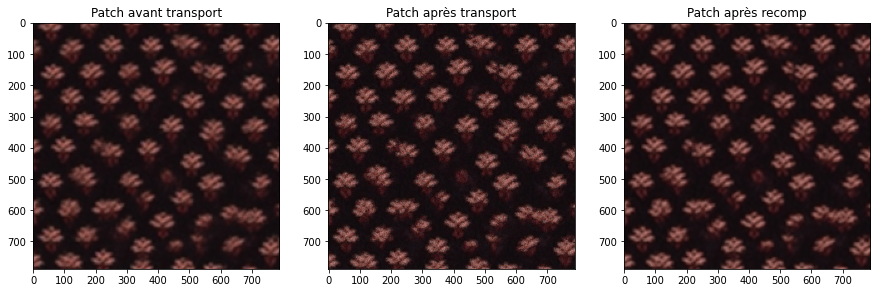

In [29]:
for i in range(4):
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    plt.title("Patch avant transport")
    display_patches(model.patches_before_transport[i],w)
    plt.subplot(132)
    plt.title("Patch après transport")
    display_patches(model.patches_after_transport[i],w)
    plt.subplot(133)
    plt.title("Patch après recomp")
    display_patches(model.patches_after_recomp[i],w)